# 2회차: Tensorflow 설치 및 기초 코딩

In [ ]:
import tensorflow as tf

print(f'텐서플로 버전: {tf.__version__}')
print(f'GPU 사용 가능 여부: {tf.config.list_physical_devices("GPU")}')

텐서플로 버전: 2.18.0
GPU 사용 가능 여부: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.5 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib # 데이터 시각화에서 한글 지원

%config InlineBackend.figure_format = 'retina' # 그림을 선명하게

In [1]:
# 1. 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input
import matplotlib.pyplot as plt

In [2]:
# 2. 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# 첫 번째 이미지 선택
image = x_train[0]     # shape: (28, 28)
label = y_train[0]

# 픽셀 숫자 그대로 출력하는 함수
def print_pixel_values(img):
    for row in img:
        line = ' '.join([str(pixel).rjust(3) for pixel in row])
        print(line)

# 출력
print(f"Label: {label}")
print_pixel_values(image)

Label: 5
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

In [ ]:
# 이미지 정규화 (0~255 → 0~1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 레이블 원-핫 인코딩
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
# 3. 모델 구성
model = Sequential([
    Input(shape=(28, 28)),               # 명시적 입력층
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# 4. 모델 컴파일
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# 5. 모델 학습
history = model.fit(
    x_train, y_train_cat,
    epochs=5,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8708 - loss: 0.4580 - val_accuracy: 0.9653 - val_loss: 0.1260
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9623 - loss: 0.1266 - val_accuracy: 0.9725 - val_loss: 0.0954
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9742 - loss: 0.0870 - val_accuracy: 0.9765 - val_loss: 0.0756
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9815 - loss: 0.0608 - val_accuracy: 0.9770 - val_loss: 0.0775
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9859 - loss: 0.0458 - val_accuracy: 0.9785 - val_loss: 0.0730


In [ ]:
# 6. 테스트 데이터 평가
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f"테스트 정확도: {test_acc * 100:.2f}%")

313/313 - 1s - 2ms/step - accuracy: 0.9747 - loss: 0.0772
테스트 정확도: 97.47%


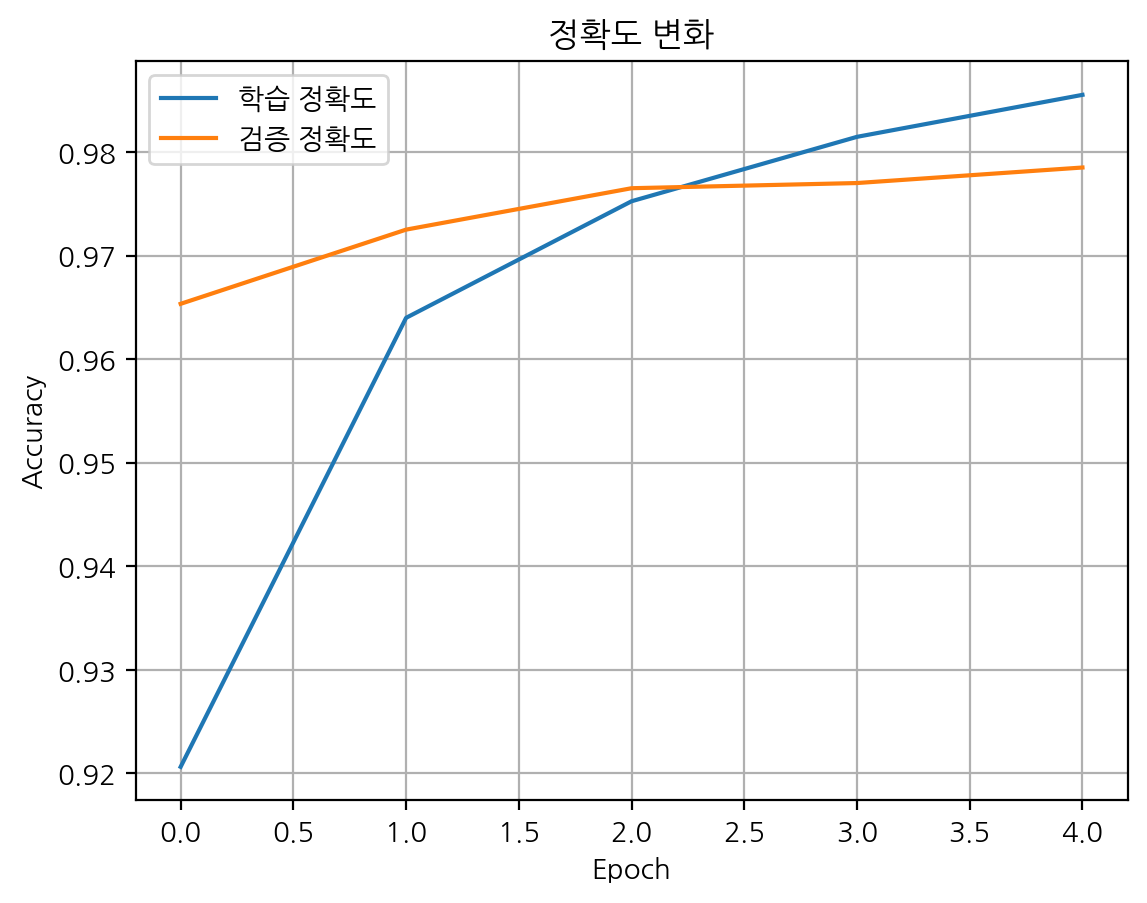

In [ ]:
# 7. 정확도 시각화
plt.plot(history.history['accuracy'], label='학습 정확도')
plt.plot(history.history['val_accuracy'], label='검증 정확도')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('정확도 변화')
plt.legend()
plt.grid(True)
plt.show()

## 전체 코드

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8722 - loss: 0.4469 - val_accuracy: 0.9667 - val_loss: 0.1227
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9621 - loss: 0.1298 - val_accuracy: 0.9730 - val_loss: 0.0925
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9755 - loss: 0.0858 - val_accuracy: 0.9735 - val_loss: 0.0910
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9821 - loss: 0.0602 - val_accuracy: 0.9732 - val_loss: 0.0872
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9867 - loss: 0.0446 - val_accuracy: 0.9775 - val_loss: 0.0805
313/313 - 1s - 2ms/step - accuracy: 0.9768 - loss: 0.0773
테스트 정확도: 97.68%


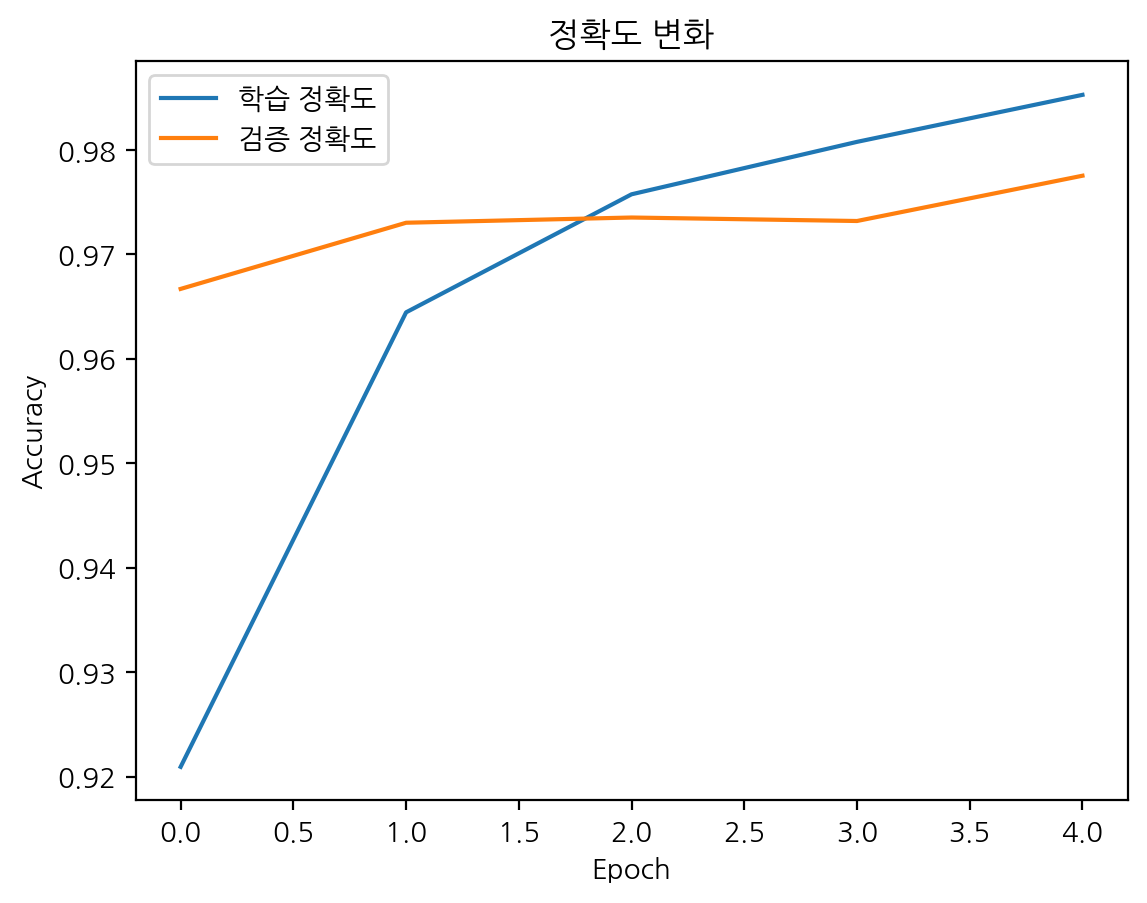

In [ ]:
# 1. 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input
import matplotlib.pyplot as plt

# 2. 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # 정규화
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 3. 모델 구성
model = Sequential([
    Input(shape=(28, 28)),           # 명시적 입력층
    Flatten(),                       # 2D 이미지 → 1D 벡터 (784차원)
    Dense(128, activation='relu'),   # 은닉층: 128개 뉴런 + ReLU
    Dense(10, activation='softmax')  # 출력층: 10개 클래스 확률
])

# 4. 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 학습
history = model.fit(x_train, y_train_cat,
                    epochs=5,
                    validation_split=0.1,
                    batch_size=32)

# 6. 평가
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f"테스트 정확도: {test_acc * 100:.2f}%")

# 7. 학습 시각화
plt.plot(history.history['accuracy'], label='학습 정확도')
plt.plot(history.history['val_accuracy'], label='검증 정확도')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('정확도 변화')
plt.show()

## End of codes